# Capstone Project - Malaria Detection. 
------  
## **Context**
------
Malaria is one of contagious disease that is serious and sometimes can cause death and it is still a burden to global health. The cause of malaria is from the plasmodium parasites which transmit to human through the bite of female Anopheles mosquitoes. These parasites can damage the red blood cells (RBCs) that carry the oxygen. The symptoms of fever, headache and chills usually appear 10-15 days after the infective mosquito bite, which can be difficult to detect, and some parasites can cause deaths in 24 hours. 
According to the latest report from World Health Organization (WHO),  In 2020, 50% of the world’s population was at risk from malaria. There were also an estimated of 241 million cases of malaria worldwide and 627,000 related deaths reported in 2020. Children under 5 years old are the most vulnerable group of people.
Early state of malaria detection is needed, and traditional diagnosis needs experienced professional to manually detect whether the red blood cell images are parasitized or uninfected and it is also time consuming. Therefore, deep learning has played a key role in increasing detection time and removing human errors in malaria detection. Several deep learning models have been studied and developed. One of the most used deep learning models in image detection and computer vision is CNN. There are several ways and techniques of creating CNN architectures and they needed to be studied carefully. One CNN model might do better in one problem but might do worst in other problems. Therefore, in this project, several CNN models are studied and several metrics to measure accuracy of different CNN models are calculated. 


------------
## **Objective**
----------  
For this project, several computer vision models are built to detect malaria by identifying the images of red blood cells if they are from the infected with malaria or not, which are identified as parasitized and uninfected, respectively. In this final report, the initial data exploration, and data preprocessing techniques are explored to gain insight into data and were used as trained image in the CNN training step to find the best model for malaria detection. 

--------
## **Key Questions**
------  
* How the image of infected and heathy red blood cell looks like? 
* What techniques should we use for image data preprocessing to make the image less complex and more clear to be used in later analysis applying computer vision model.
* How accurate our model can distingush between infected and uninfected red blood cell images? 
* Which CNN models with what structure and parameters are the best?  
* How much labeled training data is necessary for achieving acceptable accuracies?  
* Could successful model be applied on a different disease detection through transfer learning?

------------
## **Problem Formulation**
------------  
* We use data science to find what are insight data. 
* To see relationship and pattern of each variables.
* For this project, we try to normarlize image data by making them to be the same size and explore the distribution between parasitized and uninfected red blood cell images.  
* We used data science to find which image preprocessing technique that should be used before applying machine learning model. 
* Trying different CNN architectures and calculate the accuracy to see which model is the best in detecting red blood cell images. 

----------------------
## **Data Dictionary**
-----------------------  
There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:

Parasitized: The parasitized cells contain the Plasmodium parasite which causes malaria
Uninfected: The uninfected cells are free of the Plasmodium parasites

## **Mounting the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing libraries**

In [ ]:
# Libraries for loading, reading and manupulating data
import numpy as np
import pandas as pd
import zipfile
import os
from PIL import Image 

# Library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to scale data using Min-Max 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# To ignore warning
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Importing tensorflow
import tensorflow as tf

# Importing kera sequential model
from tensorflow.keras.models import Sequential

# Importing all different layes and optimizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy, binary_crossentropy

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#Clearing backend
from tensorflow.keras import backend
from random import shuffle

## **Load Data**

In [ ]:
path = '/content/drive/MyDrive/cell_images.zip'
#Extract zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
  zip_ref.extractall()

**The size of all images in the train and test folder for both parasitized and uninfected must be the same and should be converted to 4D arrays, which will be used as input for convolutional newral network. The labels for both type of images need to also be created for being able to train and test model.**

### **Training Data**

In [ ]:
#Sorting the path of extracted "train" folder
train_dir = '/content/cell_images/train'

#Size of image to have all in the same size
Size = 64

#Empty list to store the training images after they are converted to Numpy array
train_images = []

#Empty list to store the training label (0 = uninfected, 1 = parasized)
train_labels = []

In [ ]:
#Run the code within the train folder
for folder_name in ['/parasitized/','/uninfected/']:
  #path of the folder
  image_path = os.listdir(train_dir + folder_name)
  for i, image_name in enumerate(image_path):
    try:
      #opening each image using the path of that image
      image = Image.open(train_dir + folder_name + image_name)

      #Resizing each image to (64, 64)
      image = image.resize((Size, Size))

      #Converting images to arrays and appending that array to the empty list created ealier
      train_images.append(np.array(image))

      #Creating label for each image and appending to emptylist
      if folder_name == '/parasitized/':
        train_labels.append(1)
      else:
        train_labels.append(0)
    except Exception:
      pass
#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

### **Testing Data**

In [ ]:
#Sorting the path of extracted "train" folder
test_dir = '/content/cell_images/test'

#Size of image to have all in the same size
Size = 64

#Empty list to store the training images after they are converted to Numpy array
test_images = []

#Empty list to store the training label (0 = uninfected, 1 = parasized)
test_labels = []

In [ ]:
# run the code within the test folder
for folder_name in ['/parasitized/','/uninfected/']:
  #path of the folder
  image_path = os.listdir(test_dir + folder_name)
  for i, image_name in enumerate(image_path):
    try:
      #opening each image using the path of that image
      image = Image.open(test_dir + folder_name + image_name)

      #Resizing each image to (64, 64)
      image = image.resize((Size, Size))

      #Converting images to arrays and appending that array to the empty list created ealier
      test_images.append(np.array(image))

      #Creating label for each image and appending to emptylist
      if folder_name == '/parasitized/':
        test_labels.append(1)
      else:
        test_labels.append(0)
    except Exception:
      pass
#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

**Checking the shape of train and test images and train and test labels**

In [ ]:
print('Shape of training_images: ', train_images.shape)
print('Shape of training_labels: ', train_labels.shape)
print('Shape of test_images: ', test_images.shape)
print('Shape of test_labels: ', test_labels.shape)

Shape of training_images:  (24958, 64, 64, 3)
Shape of training_labels:  (24958,)
Shape of test_images:  (2600, 64, 64, 3)
Shape of test_labels:  (2600,)


**Observation and insights**  
* We can see that the shape of train and test images are 4-dimensional array.
* The shape of train and test labels are 1D, which are a vector of 24958 row, 1 column and 2600 rows, 1 column, respectively.
* There are 24958 images in the training set and 2600 images in the testing set.

**Check the minimum and maximum range of pixel values for train and test images**

In [ ]:
print('minimum range of pixel value for training data:', train_images.min())
print('maximum range of pixel value for training data:', train_images.max())
print('minimum range of pixel value for testing data:', train_images.min())
print('maximum range of pixel value for testing data:', train_images.max())

minimum range of pixel value for training data: 0
maximum range of pixel value for training data: 255
minimum range of pixel value for testing data: 0
maximum range of pixel value for testing data: 255


**Observation and insight**. 
The minimum and maximum range of pixel values for both train and test images are 0 and 255, respectively. Therefore, the image pixel value range from 0 - 255.

**Count the number of value in both uninfected and parasitized**

In [ ]:
#Convert numpy array to pandas series of train label
train_label_series = pd.Series(train_labels)

#Count value in train_labels
print(train_label_series.value_counts())

#Convert numpy array to pandas series of test label
test_label_series = pd.Series(test_labels)

#Count value in test_labels
print(test_label_series.value_counts())

1    12582
0    12376
dtype: int64
1    1300
0    1300
dtype: int64


**Observation**. 
* For the train datasets, there are 12582 parasitized images and 12376 uninfected images. 
* For the test datasets, there are 1300 parasitized and 1300 uninfected images.

**Plot data to check if it is balanced**

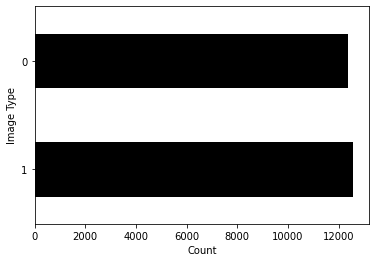

In [ ]:
from seaborn.palettes import color_palette
#Plot the labels of train data 
train_label_series.value_counts().plot(kind = 'barh', color = 'black')
plt.ylabel('Image Type')
plt.xlabel('Count')
plt.show()

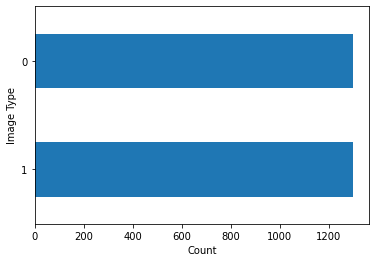

In [ ]:
#plot the labels of test data
test_label_series.value_counts().plot(kind = 'barh')
plt.ylabel('Image Type')
plt.xlabel('Count')
plt.show()

**Observation and insight**. 
* For the train label, they are considered as uniformily distributed because the value of parasitized and uninfected are only slightly different. 
* For the test lebel, parasitized and uninfected split the count value equally, which is uniformly distributed. 

## **Normalize the images**  
We are normalizing images to ensure that each input parameters(pixels) has similar data distribution, which makes faster convergence in the training step with neural network.

In [ ]:
#Normalize image by divided the train and test data set with 255
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

**Before building the CNN models to train the datasets and predict the parasitized and uninfected images, the data exploration needs to be done**  


## **Data Exploratory Analysis**

**First we are visualizing the image in the train dataset**

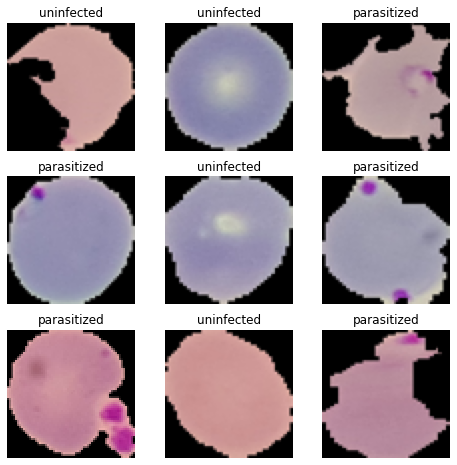

In [ ]:
#Visualize both parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (8,8))

for n in range(1,10):
  plt.subplot(3,3,n)
  index = int(np.random.randint(0, train_images.shape[0], 1))
  if train_labels[index] == 1:
    plt.title('parasitized')
  else:
    plt.title('uninfected')
  plt.imshow(train_images[index])
  plt.axis('off')

**Observation and insights**   
We view 9 images of parasitized and unifected red blood cells. It looks like that the images with has no spot of purple color are the uninfected one, while the images that have purple spots are the parasitized image. However the red blood cell backgrounds are different, which might comes from different laboratories or different time of executing the experiment.

**We can also perform other image data preprocessing to convert original image in other forms such as HSV, gaussian blurring, and data augmentation.**

### **Converting RBG (original image) to HSV Image using OpenCV**

**Converting train data and test data**

**Train_image**

In [ ]:
#Converting train data from RBG to HSV using OpenCV
import cv2

hsv_train = [] # to hold the HSV image array
for i in train_images:
  a = cv2.cvtColor(i, cv2.COLOR_BGR2HSV)
  hsv_train.append(a)
hsv_train = np.array(hsv_train)

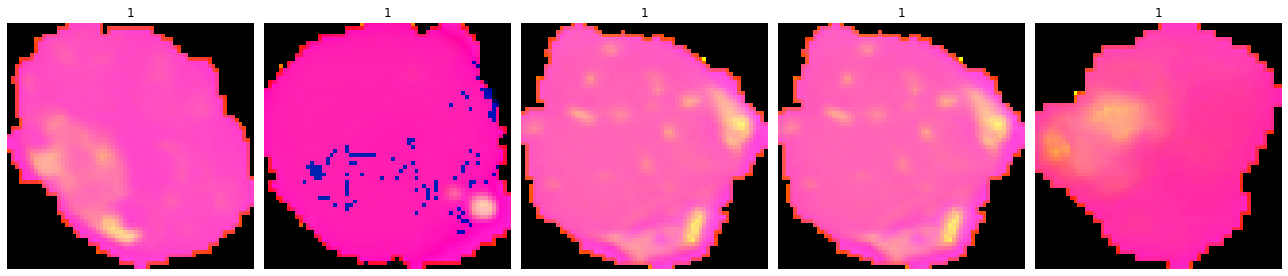

In [ ]:
#Visualizing HSV image in train set
view_image = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), view_image):

  Title = train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(hsv_train[i])
  ax[t].set_axis_off()
  fig.tight_layout()

**Test image**

In [ ]:
#Converting train data from RBG to HSV using OpenCV
import cv2

hsv_test = [] # to hold the HSV image array
for i in test_images:
  a = cv2.cvtColor(i, cv2.COLOR_BGR2HSV)
  hsv_test.append(a)
hsv_test = np.array(hsv_test)

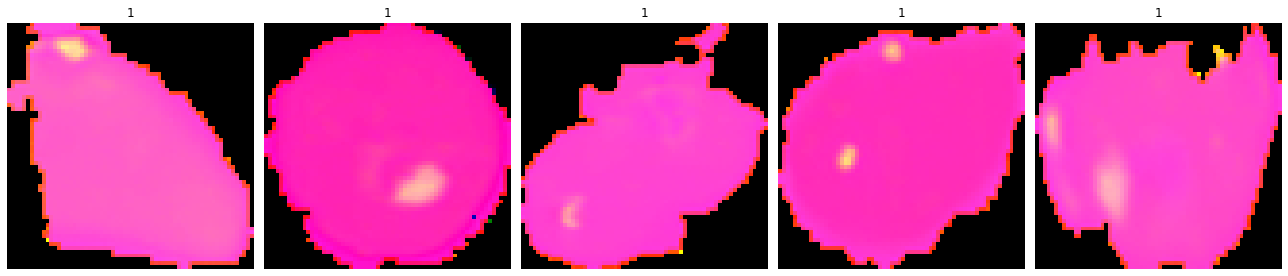

In [ ]:
#Visualizing HSV image in test set
view_image = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), view_image):

  Title = test_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(hsv_test[i])
  ax[t].set_axis_off()
  fig.tight_layout()

**Observation and insights**. 
* All the images from both train and test datasets classified as 1, which is parasitized.  
* The imagas are clearer to compare beacuse they are all have the same background color (pink in these observation), so we can see the other color spot on each image easier. The yellow spot could be the parasitized while the blue spots might be the impurity.
* HSV is known as the **hue**, **saturation**, **value**, which are a alternative representation of the RBG and it is designed to be closer to how human vision perceives the color and it is more robust toward a lighting change.
* HSV should be prefered as we distinguish the uninfected and infected red blood cell from color.



### **Converting RBG (original image) to Gaussian blurring image using OpenCV**

**Train image**

In [ ]:
#Converting train data from RBG to Gray scale image using OpenCV
import cv2

gauss_train = [] 
for i in train_images:
  a = cv2.GaussianBlur(i, (5,5), 0)
  gauss_train.append(a)
gauss_train = np.array(gauss_train)

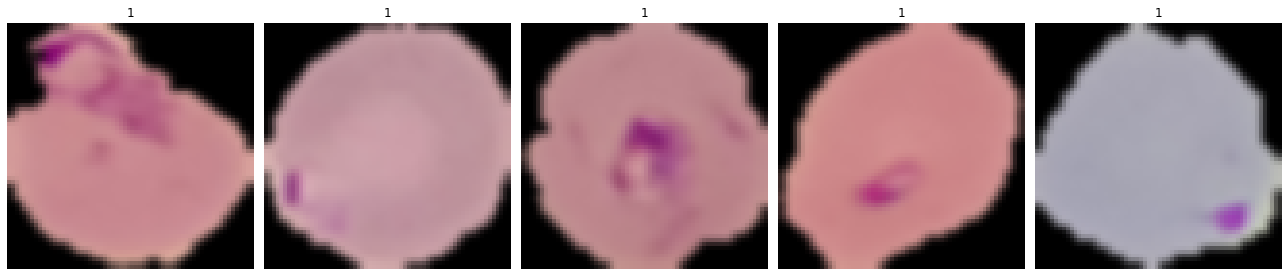

In [ ]:
#Visualize gaussian blurring image in train set
view_image = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), view_image):

  Title = train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gauss_train[i])
  ax[t].set_axis_off()
  fig.tight_layout()

**Test image**

In [ ]:
import cv2

gauss_test = [] # to hold the HSV image array
for i in test_images:
  a = cv2.GaussianBlur(i, (5,5), 0)
  gauss_test.append(a)
gauss_test = np.array(gauss_test)

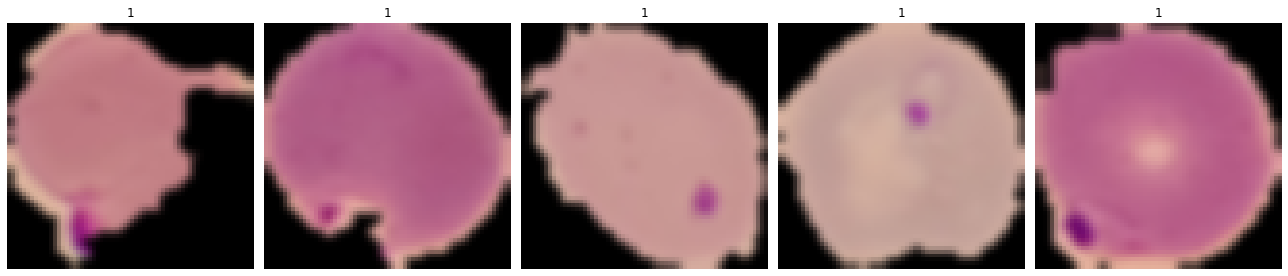

In [ ]:
view_image = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), view_image):

  Title = test_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gauss_test[i])
  ax[t].set_axis_off()
  fig.tight_layout()

**Observation and Insight**
* We can see that all parasitized images from both test and train dataset are blurry and the edges are smoother. 
* Gaussian blurring is another feature used in image preprocessing. It is using gaussian function to remove noise. It is important to remove the very high frequency components that can cause false edges to be detected. 
* The Gaussian blurring technique make the color transition from one side of an edge in image to another smooth, which in another word smooth the sudden change of pixel intensity.
* This reduce the amount of data in an image while preserving the structural properties of an image, which can be used in convolutional neural network in the pooling step where the size of image is reduced.
* The noise of images can also be reduce using other techniques, such as scaling, binary threshold and dilation.


## **Building the model**

### **Building CNN model**

## **One Hot Encoding on the train and test labels**

In [ ]:
#Encoding train labels
train_labels = to_categorical(train_labels, 2)
test_labels = to_categorical(test_labels, 2)

**Observation**  
Each entry of the train labels is a one-hot encoded 2-dimensional matrix.

In [ ]:
#Checking the shape of train and test set
print('Shape of training_images: ', train_images.shape)
print('Shape of training_labels: ', train_labels.shape)
print('Shape of test_images: ', test_images.shape)
print('Shape of test_labels: ', test_labels.shape)

Shape of training_images:  (24958, 64, 64, 3)
Shape of training_labels:  (24958, 2)
Shape of test_images:  (2600, 64, 64, 3)
Shape of test_labels:  (2600, 2)


### **Model1**  
Creating model one without convolutional layers, only have dense layers.


In [ ]:
# Clearing backend for the new model

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators to ensure that we can ensure we received the same output everytime.
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

**Creating first model using Artificial Neural Network(ANN)**

In [ ]:
#Creating model with ANN. 
model1 = Sequential()

model1.add(Dense(32, activation='relu', input_shape=(64,64,3)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(2, activation='softmax'))

model1.compile(loss = 'binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy']
                 )
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64, 64, 32)        128       
                                                                 
 dense_1 (Dense)             (None, 64, 64, 64)        2112      
                                                                 
 dense_2 (Dense)             (None, 64, 64, 128)       8320      
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 dense_3 (Dense)             (None, 256)               134217984 
                                                                 
 dense_4 (Dense)             (None, 2)                 514       
                                                                 
Total params: 134,229,058
Trainable params: 134,229,058


In [ ]:
#Using callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2, restore_best_weights= True),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
#Fit model to train data
history = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, 
                    validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 43s 65ms/step - loss: 0.4168 - accuracy: 0.8408 - val_loss: 0.3279 - val_accuracy: 0.9473
Epoch 2/20
624/624 [==============================] - 37s 60ms/step - loss: 0.1627 - accuracy: 0.9408 - val_loss: 0.1940 - val_accuracy: 0.9183
Epoch 3/20
624/624 [==============================] - 41s 66ms/step - loss: 0.1414 - accuracy: 0.9512 - val_loss: 0.1899 - val_accuracy: 0.8858
Epoch 4/20
624/624 [==============================] - 39s 62ms/step - loss: 0.1210 - accuracy: 0.9572 - val_loss: 0.1028 - val_accuracy: 0.9754
Epoch 5/20
624/624 [==============================] - 33s 52ms/step - loss: 0.1083 - accuracy: 0.9614 - val_loss: 0.1299 - val_accuracy: 0.9878
Epoch 6/20
624/624 [==============================] - 31s 50ms/step - loss: 0.0936 - accuracy: 0.9667 - val_loss: 0.1302 - val_accuracy: 0.9505


**Evaluating model on the test images**

In [ ]:
#Evaluating the model on test data
accuracy = model1.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 13ms/step - loss: 0.1560 - accuracy: 0.9300

 Test_Accuracy:- 0.9300000071525574


**Plotting the train and validation accuracy**

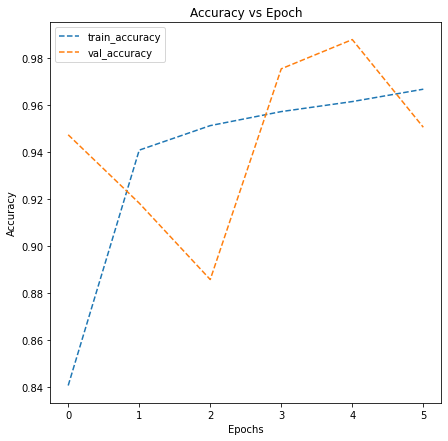

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

plot_accuracy(history)

**Ploting the confusion matrix**

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1300
           1       0.95      0.90      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



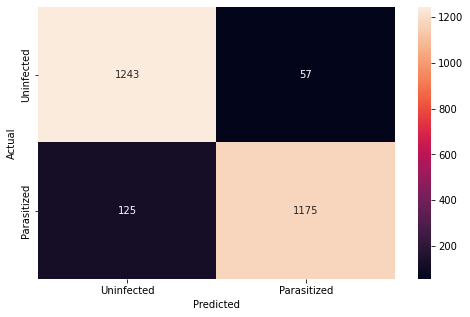

In [ ]:
#Confusion matrix
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

test_pred = model1.predict(test_images)
test_pred = np.argmax(test_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

#Printing the classification report

print(classification_report(y_true, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observation**
* For this model1 with only dense layer (fully connected layer) in ANN, we did get the accuracy of validation set higher than training set at some epochs and lower at some other epoch.
* We can see that with callbacks using EarlyStopping and ModelChecpoint, the model train only until eporch equal to 6 because the model is not improving anymore. 
* The save_best_only save the best model with the lowest loss on validation set, which is at epoch = 4, which show validation accuracy of 97.54 and the training accuracy of 95.72
* Model accuracy on testing set is 93%.  
* From the confusion matrix, this model provide very high False Negative(FN) error, which effect the % recall for identifying parasitized images.

## **Model2**  
Building CNN model by having the same number of neurons in each convolutional layers compared to **Model1**. Each layer in this model has assigned dropout to reduce the overfitting of the model

In [ ]:
# Clearing backend for the new model

from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators to ensure that we can ensure we received the same output everytime.
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
#Creating sequential model
model2 = Sequential()

#Build the first layer with 32 neurons of input shape of 64,64,3
model2.add(Conv2D(filters = 32, kernel_size=(3,3), padding='same', activation="relu", input_shape =(64,64,3)))
#Add maxpooling layer 
model2.add(MaxPool2D(pool_size = 2))
#Add dropout layer 
model2.add(Dropout(0.2))

#Add the second layer with 64 neurons
model2.add(Conv2D(filters = 64, kernel_size=(3,3), padding='same', activation="relu"))
#Add maxpooling layer 
model2.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model2.add(Dropout(0.2))

#Add third layer with 128 neurals
model2.add(Conv2D(filters = 128, kernel_size=(3,3), padding='same', activation="relu"))
#Add maxpooling layer 
model2.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model2.add(Dropout(0.2))

#Flatten output from previous layer
model2.add(Flatten())
model2.add(Dense(256, activation = "relu"))
model2.add(Dropout(0.4))

#Add final output layer with # of node = 2 using softmax as activation function
model2.add(Dense(2, activation = 'softmax'))
    
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [ ]:
# Compile the model
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#Using callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2, restore_best_weights= True),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
#Fit the training and validation set
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, 
                    validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 16s 10ms/step - loss: 0.3108 - accuracy: 0.8554 - val_loss: 0.1147 - val_accuracy: 0.9820
Epoch 2/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0887 - accuracy: 0.9711 - val_loss: 0.1053 - val_accuracy: 0.9830
Epoch 3/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0810 - accuracy: 0.9738 - val_loss: 0.0791 - val_accuracy: 0.9808
Epoch 4/20
624/624 [==============================] - 5s 9ms/step - loss: 0.0721 - accuracy: 0.9767 - val_loss: 0.0758 - val_accuracy: 0.9780
Epoch 5/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0665 - accuracy: 0.9773 - val_loss: 0.0748 - val_accuracy: 0.9778
Epoch 6/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0626 - accuracy: 0.9804 - val_loss: 0.0753 - val_accuracy: 0.9736
Epoch 7/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0623 - accuracy: 0.9792 - val_loss: 0.0501 - val_accuracy: 0.9850
Epoc

In [ ]:
accuracy = model2.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0529 - accuracy: 0.9808

 Test_Accuracy:- 0.9807692170143127


**Observation**  
* We can see that when we train the data using CNN architecture the test accuracy is higher and it is now 98.08% accuracy on the test set.  
* The best model is save as the val_loss of 0.0427. validation accuracy of 98.86% and training accuracy of 98.09%.

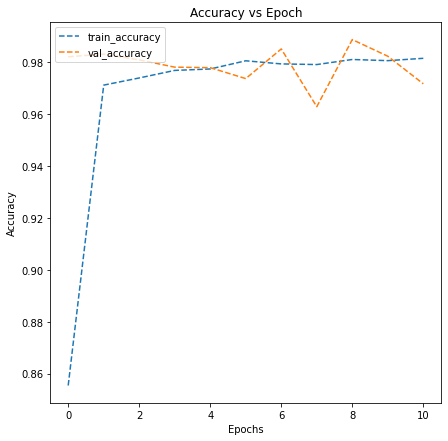

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history2):

    N = len(history2.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history2.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history2.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

plot_accuracy(history2)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1300
           1       0.99      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



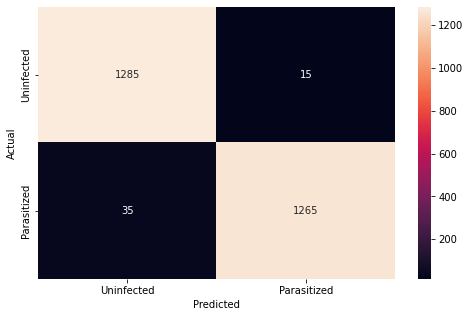

In [ ]:
#Confusion matrix
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

test_pred = model2.predict(test_images)
test_pred = np.argmax(test_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

#Printing the classification report

print(classification_report(y_true, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observation**  
* The validation accuracy plot are not as smooth as the training plot. The percent accuracy are similar; therefore, our model is generalizable.  
* From confusion matrix, the 35 false negative(FN) images where the model predict uninfected, but it is actually parasited are detected, and 15 false positive (FP) images where the model predict parasitized but it is actually uninfected are shown.   
* The model correctly predict 1285 uninfected image and correctly predict 1265 parasitized image.  


## **Model3**  
**If we have number of neurons the same in all convolutional layers, what is the different between the accuracy of this model and the model2 where the nueron at each layer is different?**

In [ ]:
# Clearing backend for the new model

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
#Creating sequential model
model3 = Sequential()

#Build the first layer with 32 neurons of input shape of 64,64,3
model3.add(Conv2D(filters = 32, kernel_size=(3,3), padding='same', activation="relu", input_shape =(64,64,3)))
#Add maxpooling layer 
model3.add(MaxPool2D(pool_size = 2))
#Add dropout layer 
model3.add(Dropout(0.2))

#Add the second layer with 32 neurons
model3.add(Conv2D(filters = 32, kernel_size=(3,3), padding='same', activation="relu"))
#Add maxpooling layer 
model3.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model3.add(Dropout(0.2))

#Add third layer with 32 neurals
model3.add(Conv2D(filters = 32, kernel_size=(3,3), padding='same', activation="relu"))
#Add maxpooling layer 
model3.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model3.add(Dropout(0.2))

#Flatten output from previous layer
model3.add(Flatten())
model3.add(Dense(256, activation = "relu"))
model3.add(Dropout(0.4))

#Add final output layer with # of node = 2 using softmax as activation function
model3.add(Dense(2, activation = 'softmax'))
    
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

 **Compliling the model**

In [ ]:
# Compile the model
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

**Using Callbacks**  
We are using callbacks to stop the model fitting step when the model is not improving anymore to save time in fitting and training the model

In [ ]:
#Using callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2, restore_best_weights= True),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

**Fit and train the model**

In [ ]:
history = model3.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, 
                    validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 5s 7ms/step - loss: 0.2905 - accuracy: 0.8629 - val_loss: 0.0890 - val_accuracy: 0.9878
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0999 - accuracy: 0.9660 - val_loss: 0.1231 - val_accuracy: 0.9876
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0864 - accuracy: 0.9710 - val_loss: 0.0789 - val_accuracy: 0.9904
Epoch 4/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0762 - accuracy: 0.9746 - val_loss: 0.0897 - val_accuracy: 0.9818
Epoch 5/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0741 - accuracy: 0.9753 - val_loss: 0.1056 - val_accuracy: 0.9798


**Evaluating the model on test data**

In [ ]:
accuracy = model3.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0733 - accuracy: 0.9792

 Test_Accuracy:- 0.9792307615280151


### **Observation**  
* The best model with the lowest validation loss is at epoch = 3 showing training accuracy and validation accuracy of 97.10% and 99.04%, respectively
* For the performance of the model on testing data, the accuracy is 97.92%, which is lower than the previous model where each layer of ConV2D has different number of neurons.

**plotting the train and validation curves**

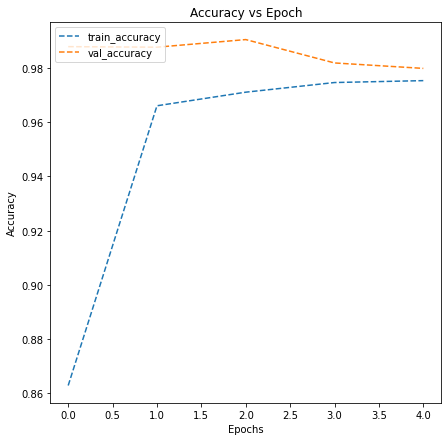

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

plot_accuracy(history)

**Plotting the confusion matrix**

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1300
           1       0.99      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



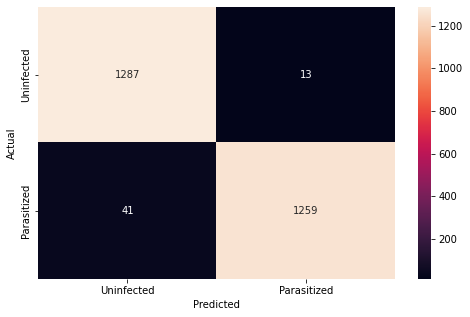

In [ ]:
#Confusion matrix
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

test_pred = model3.predict(test_images)
test_pred = np.argmax(test_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

#Printing the classification report

print(classification_report(y_true, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()


**Observation**  
* The training accuracy and increasing after the first eporch which is the same observation for the validation set.  
* The validation accuracy are slightly higher than the training accuracy, which might be due to dropout layers, which lower the accuracy of model on training data. 
* From the confusion matrix, we can see that they are 41 false negative and 13 false positive. We would like the model that can reduce this error. False negative is more important as we do not want to not provide treatment for who actually are infected from malaria.
* We get a recall, precision and f1 score in the same range, which is about 97-99%.

## **Model4**  
**Try to improve the performance of the model by adding one more layer into model2**

In [ ]:
# Clearing backend for the new model

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
#Creating sequential model
model4 = Sequential()

#Build the first layer with 32 neurons of input shape of 64,64,3
model4.add(Conv2D(filters = 32, kernel_size=(3,3), padding='same', activation="relu", input_shape =(64,64,3)))
#Add maxpooling layer 
model4.add(MaxPool2D(pool_size = 2))
#Add dropout layer 
model4.add(Dropout(0.2))

#Add the second layer with 64 neurons
model4.add(Conv2D(filters = 64, kernel_size=(3,3), padding='same', activation="relu"))
#Add maxpooling layer 
model4.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model4.add(Dropout(0.2))

#Add third layer with 128 neurals
model4.add(Conv2D(filters = 128, kernel_size=(3,3), padding='same', activation="relu"))
#Add maxpooling layer 
model4.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model4.add(Dropout(0.2))

#Add fourth layer with 256 neurals
model4.add(Conv2D(filters = 256, kernel_size=(3,3), padding='same', activation="relu"))
#Add maxpooling layer 
model4.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model4.add(Dropout(0.2))

#Flatten output from previous layer
model4.add(Flatten())
model4.add(Dense(256, activation = "relu"))
model4.add(Dropout(0.4))

#Add final output layer with # of node = 2 using softmax as activation function
model4.add(Dense(2, activation = 'softmax'))
    
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [ ]:
# Compile the model
model4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#Using callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights= True),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
#Fit the model
history = model4.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, 
                    validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 16s 9ms/step - loss: 0.2389 - accuracy: 0.8866 - val_loss: 0.0561 - val_accuracy: 0.9892
Epoch 2/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0796 - accuracy: 0.9747 - val_loss: 0.0576 - val_accuracy: 0.9862
Epoch 3/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0693 - accuracy: 0.9777 - val_loss: 0.0866 - val_accuracy: 0.9798
Epoch 4/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0677 - accuracy: 0.9778 - val_loss: 0.0672 - val_accuracy: 0.9832


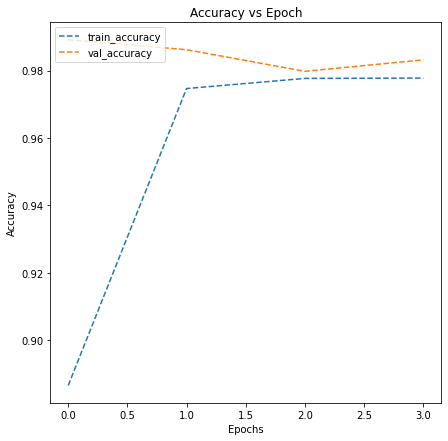

In [ ]:
#plotting the train and the validation curves
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

plot_accuracy(history)

In [ ]:
#Test model accuracy on the test images
accuracy = model4.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0741 - accuracy: 0.9731

 Test_Accuracy:- 0.9730769395828247


**Observation**. 
* The model accuracy on testing set did not improve from 98.08% from **model2**. This model with more layer shows the accuracy of 97.3% on testing data.
* Validation accuracy plot is higher that training accuracy plot 
* The best model is 98.92% and 88.66% of validation accuracy and training accuracy at the lowest validation loss of 0.0561

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1300
           1       0.99      0.96      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



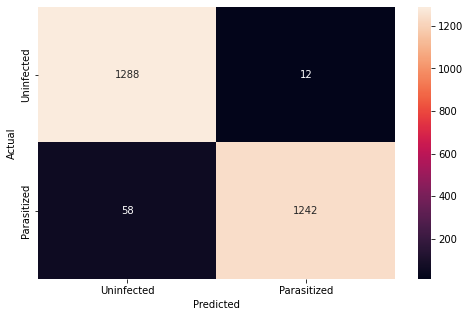

In [ ]:
#Confusion matrix
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

#Plotting confusion matrix
test_pred = model4.predict(test_images)
test_pred = np.argmax(test_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

#Printing the classification report

print(classification_report(y_true, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observation**. 
* From the confusion matrix, 58 FN and 12 FP were calculated. We are now trying to reduce the FN number.   
* %recall and %precision decreased from **model2**. 
* So adding one more layer seem to not increase model performance in this case.

**Lets build another model with activationa function method called "LeakyRelu"**  
* **Can LeakyRelu and BatchNormalization improve our model**

## **Model 5**
This model will add BatchNormalization and LeakyRelu into model2, which is so far the best model in this study.

In [ ]:
backend.clear_session() #Clearing the backend for new model

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Building the model5**

In [ ]:
#Creating sequential model
model5 = Sequential()

#Build the first layer with 32 neurons of input shape of 64,64,3
model5.add(Conv2D(filters = 32, kernel_size=(3,3), padding='same', input_shape =(64,64,3)))
#Add LeakyReLu with a slope of 0.1 
model5.add(LeakyReLU(0.1))
#Add maxpooling layer 
model5.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model5.add(Dropout(0.2))

#Add the second layer with 64 neurons
model5.add(Conv2D(filters = 64, kernel_size=(3,3), padding='same'))
#Add LeakyReLu with a slope of 0.1 
model5.add(LeakyReLU(0.1))
#Add maxpooling layer 
model5.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model5.add(Dropout(0.2))

#Add third layer with 128 neurals
model5.add(Conv2D(filters = 128, kernel_size=(3,3), padding='same'))
#Add LeakyReLu with a slope of 0.1 
model5.add(LeakyReLU(0.1))
#Add maxpooling layer 
model5.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model5.add(Dropout(0.2))

# Add BatchNormalization layer
model5.add(BatchNormalization())

#Flatten output from previous layer
model5.add(Flatten())

#Add dense layers
model5.add(Dense(256))
#Add LeakyReLu with a slope of 0.1 
model5.add(LeakyReLU(0.1))
#Add dropout layer
model5.add(Dropout(0.4))


#Add final output layer with # of node = 2 using softmax as activation function
model5.add(Dense(2, activation = 'softmax'))

adam = optimizers.Adam(learning_rate= 0.001)    
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                        

**Compiling the model**

In [ ]:
#Compile the model
model5.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

**Using callbacks**

In [ ]:
#Create callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2,restore_best_weights= True ),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

**Fit and train the model**

In [ ]:
history = model5.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, 
                    validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 6s 9ms/step - loss: 0.3550 - accuracy: 0.8366 - val_loss: 0.1093 - val_accuracy: 0.9872
Epoch 2/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0993 - accuracy: 0.9693 - val_loss: 0.1182 - val_accuracy: 0.9840
Epoch 3/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0894 - accuracy: 0.9718 - val_loss: 0.1024 - val_accuracy: 0.9862
Epoch 4/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0850 - accuracy: 0.9744 - val_loss: 0.1968 - val_accuracy: 0.9766
Epoch 5/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0849 - accuracy: 0.9741 - val_loss: 0.0995 - val_accuracy: 0.9870
Epoch 6/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0824 - accuracy: 0.9749 - val_loss: 0.1104 - val_accuracy: 0.9852
Epoch 7/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0743 - accuracy: 0.9770 - val_loss: 0.1121 - val_accuracy: 0.9848


**plotting the train and validation accuracy**

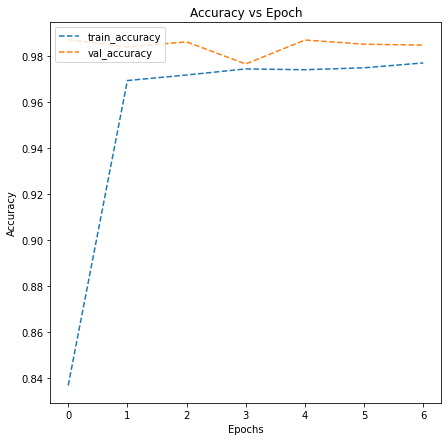

In [ ]:
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")
plot_accuracy(history)

**Evaluating the model**

In [ ]:
accuracy = model5.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0665 - accuracy: 0.9838

 Test_Accuracy:- 0.983846127986908


**Generate the classification report and confusion matrix**

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



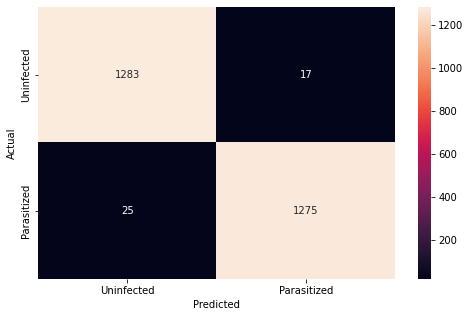

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
#Plotting confusion matrix
test_pred = model5.predict(test_images)
test_pred = np.argmax(test_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

#Printing the classification report

print(classification_report(y_true, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observation and Insight**   
* For this model where we change activation function from ReLu to Leaky ReLu, and adding batch normalization before flatten layer, we found that the accuracy on testing set is **98.38%**, which is better than model **model2** (98.08%).  
* The best model is save with the lowest validation loss =0.0995, that has validation accuracy and training accuracy of 98.70% and 97.41%, respectively.
* The validation accuracy is slightly higher than training accuracy.  
* We get the lost number of FN of 25 images, which is the lowest so far among the other models with %recall of 98%.



**Now let build another model using Image Data Augmentation and see if our model can be improved**

## **Model 6 with Data Augmentation**

In [ ]:
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)

tf.random.set_seed(42)

**Using image data generator**

In [ ]:
#Split data using train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                  zoom_range= 0.2,rotation_range = 40, shear_range=0.2, fill_mode='nearest')

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

**Visualizing Augmented Images**

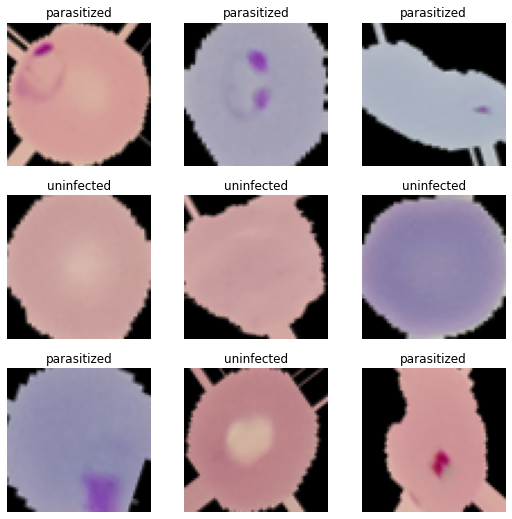

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(3, 3, figsize = (16, 8))

fig.set_size_inches(9, 9)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

**Observation and Insights**  
* There are several orientations of the images being generated. The size and the shape are also different  
* Data Augmentation increase the diversity of data, and the amount of data available for training without adding any new data. In this case we use the ImageDataGenerator to flip, zoom and rotate the images.


**Build the model6**

In [ ]:
#Creating sequential model
model6 = Sequential()

#Build the first layer with 32 neurons of input shape of 64,64,3
model6.add(Conv2D(filters = 32, kernel_size=(3,3), padding='same', input_shape =(64,64,3)))
#Add LeakyReLu with a slope of 0.1 
model6.add(LeakyReLU(0.1))
#Add maxpooling layer 
model6.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model6.add(Dropout(0.2))

#Add the second layer with 64 neurons
model6.add(Conv2D(filters = 64, kernel_size=(3,3), padding='same'))
#Add LeakyReLu with a slope of 0.1 
model6.add(LeakyReLU(0.1))
#Add maxpooling layer 
model6.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model6.add(Dropout(0.2))

#Add third layer with 128 neurals
model6.add(Conv2D(filters = 128, kernel_size=(3,3), padding='same'))
#Add LeakyReLu with a slope of 0.1 
model6.add(LeakyReLU(0.1))
#Add maxpooling layer 
model6.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model6.add(Dropout(0.2))

# Add BatchNormalization layer
model6.add(BatchNormalization())

#Flatten output from previous layer
model6.add(Flatten())

#Add dense layers
model6.add(Dense(256))
#Add LeakyReLu with a slope of 0.1 
model6.add(LeakyReLU(0.1))
#Add dropout layer
model6.add(Dropout(0.4))


#Add final output layer with # of node = 2 using softmax as activation function
model6.add(Dense(2, activation = 'softmax'))

adam = optimizers.Adam(learning_rate= 0.001)    
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                        

In [ ]:
adam = optimizers.Adam(learning_rate = 0.001)

model6.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

**Using callbacks**

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights= True ),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

**Fit and Train the model**

In [ ]:
history = model6.fit(train_generator,  validation_data = val_generator, 
                      batch_size = 32, callbacks = callbacks, 
                      epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 26s 81ms/step - loss: 0.3948 - accuracy: 0.8141 - val_loss: 0.5709 - val_accuracy: 0.5519
Epoch 2/20
312/312 [==============================] - 24s 78ms/step - loss: 0.1306 - accuracy: 0.9582 - val_loss: 0.0852 - val_accuracy: 0.9742
Epoch 3/20
312/312 [==============================] - 24s 78ms/step - loss: 0.1125 - accuracy: 0.9655 - val_loss: 0.0739 - val_accuracy: 0.9804
Epoch 4/20
312/312 [==============================] - 24s 78ms/step - loss: 0.1056 - accuracy: 0.9692 - val_loss: 0.0796 - val_accuracy: 0.9814
Epoch 5/20
312/312 [==============================] - 24s 77ms/step - loss: 0.1077 - accuracy: 0.9681 - val_loss: 0.1035 - val_accuracy: 0.9708
Epoch 6/20
312/312 [==============================] - 24s 78ms/step - loss: 0.0970 - accuracy: 0.9697 - val_loss: 0.0939 - val_accuracy: 0.9730
Epoch 7/20
312/312 [==============================] - 24s 77ms/step - loss: 0.1010 - accuracy: 0.9702 - val_loss: 0.0697 - val_accuracy:

### **Evaluating the model**

**Plot the train and validation accuracy**

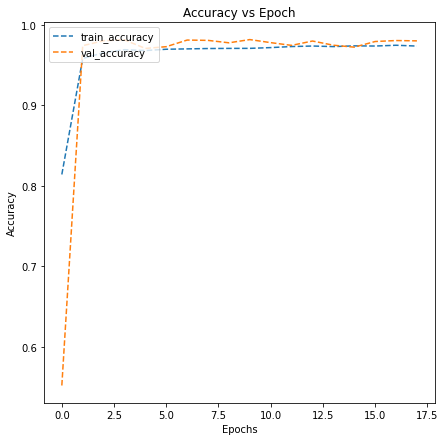

In [ ]:
#plotting the accuracies
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")
plot_accuracy(history)

**Observation**. 
* Validation accuracy plot is slightly higher than training accuracy plot. 
* The best model is save with the lowest validation loss of 0.0617 of 97.38% training accuracy and 98.00% validation accuracy.

In [ ]:
# Evaluating the model on test data
accuracy = model6.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0474 - accuracy: 0.9858

 Test_Accuracy:- 0.9857692122459412


**Plotting the classification report and confusion matrix**

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



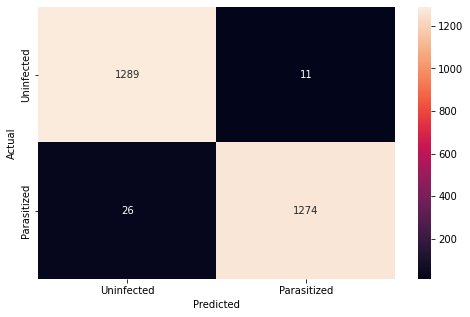

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
#Plotting confusion matrix
test_pred = model6.predict(test_images)
test_pred = np.argmax(test_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

#Printing the classification report

print(classification_report(y_true, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observation and Insight**  
* The accuracy on testing set is 98.58% which is slightly better than that of model5. However, the FN error is slightly less than **model5**. We can try to improve model by applying different transformation parameters.  
* 98% recall, precision and f1-score is shown from the report.

**Now, Let's try another image data preprocessing techniques such as HSV and Gaussian blur and using model5 that has highest % on the testing data**

## **Model7 with HSV image**

In [ ]:
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)

tf.random.set_seed(42)

In [ ]:
#Creating sequential model
model7 = Sequential()

#Build the first layer with 32 neurons of input shape of 64,64,3
model7.add(Conv2D(filters = 32, kernel_size=(3,3), padding='same', input_shape =(64,64,3)))
#Add LeakyReLu with a slope of 0.1 
model7.add(LeakyReLU(0.1))
#Add maxpooling layer 
model7.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model7.add(Dropout(0.2))

#Add the second layer with 64 neurons
model7.add(Conv2D(filters = 64, kernel_size=(3,3), padding='same'))
#Add LeakyReLu with a slope of 0.1 
model7.add(LeakyReLU(0.1))
#Add maxpooling layer 
model7.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model7.add(Dropout(0.2))

#Add third layer with 128 neurals
model7.add(Conv2D(filters = 128, kernel_size=(3,3), padding='same'))
#Add LeakyReLu with a slope of 0.1 
model7.add(LeakyReLU(0.1))
#Add maxpooling layer 
model7.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model7.add(Dropout(0.2))

# Add BatchNormalization layer
model7.add(BatchNormalization())

#Flatten output from previous layer
model7.add(Flatten())

#Add dense layers
model7.add(Dense(256))
#Add LeakyReLu with a slope of 0.1 
model7.add(LeakyReLU(0.1))
#Add dropout layer
model7.add(Dropout(0.4))


#Add final output layer with # of node = 2 using softmax as activation function
model7.add(Dense(2, activation = 'softmax'))

adam = optimizers.Adam(learning_rate= 0.001)    
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                        

In [ ]:
# Compile the model
model7.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights= True),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
history = model7.fit(hsv_train, train_labels, batch_size = 32, callbacks = callbacks, 
                    validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 7s 10ms/step - loss: 0.7293 - accuracy: 0.6128 - val_loss: 0.6189 - val_accuracy: 0.7592
Epoch 2/20
624/624 [==============================] - 5s 9ms/step - loss: 0.6346 - accuracy: 0.6614 - val_loss: 0.9205 - val_accuracy: 0.3714
Epoch 3/20
624/624 [==============================] - 5s 7ms/step - loss: 0.6019 - accuracy: 0.6881 - val_loss: 0.9706 - val_accuracy: 0.2588
Epoch 4/20
624/624 [==============================] - 5s 7ms/step - loss: 0.5824 - accuracy: 0.7053 - val_loss: 1.5262 - val_accuracy: 0.1290
Epoch 5/20
624/624 [==============================] - 5s 8ms/step - loss: 0.5574 - accuracy: 0.7199 - val_loss: 1.5360 - val_accuracy: 0.3029
Epoch 6/20
624/624 [==============================] - 5s 8ms/step - loss: 0.5334 - accuracy: 0.7400 - val_loss: 0.4841 - val_accuracy: 0.7300
Epoch 7/20
624/624 [==============================] - 5s 7ms/step - loss: 0.5140 - accuracy: 0.7529 - val_loss: 1.7249 - val_accuracy: 0.2328
Epoch

In [ ]:
accuracy = model7.evaluate(hsv_test, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 4ms/step - loss: 0.1087 - accuracy: 0.9646

 Test_Accuracy:- 0.9646154046058655


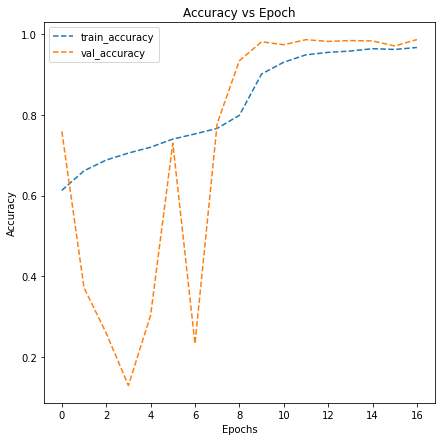

In [ ]:
# plotting the accuracies
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")
plot_accuracy(history)

**Observation**. 
* For this the fitting process run for 20 epochs and the validation accuracy plot is higher than training accuracy plot form epoch = 7. The accuracy increase when we run more epochs for HSV image.  
* The model accuracy on testing set is 96.46%.  
* The best model has the validation accuracy of 98.14%, and training accuracy of 00.15%.

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1300
           1       0.99      0.94      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.97      0.96      0.96      2600
weighted avg       0.97      0.96      0.96      2600



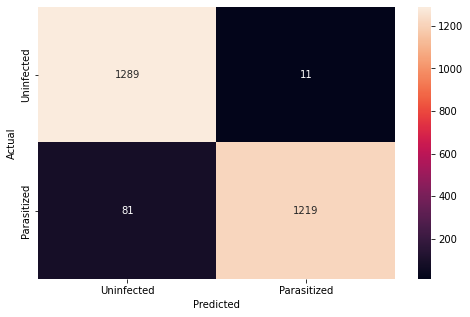

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
#Plotting confusion matrix
test_pred = model7.predict(hsv_test)
test_pred = np.argmax(test_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

#Printing the classification report

print(classification_report(y_true, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observation**. 
* Form the confusion matrix, model did not do well with the FN error and lowest % recall, so the HSV might not be a good images for model to train on in this case.

## **Model8: Try Gaussian Blurring**

In [ ]:
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)

tf.random.set_seed(42)

In [ ]:
#Creating sequential model
model8 = Sequential()

#Build the first layer with 32 neurons of input shape of 64,64,3
model8.add(Conv2D(filters = 32, kernel_size=(3,3), padding='same', input_shape =(64,64,3)))
#Add LeakyReLu with a slope of 0.1 
model8.add(LeakyReLU(0.1))
#Add maxpooling layer 
model8.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model8.add(Dropout(0.2))

#Add the second layer with 64 neurons
model8.add(Conv2D(filters = 64, kernel_size=(3,3), padding='same'))
#Add LeakyReLu with a slope of 0.1 
model8.add(LeakyReLU(0.1))
#Add maxpooling layer 
model8.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model8.add(Dropout(0.2))

#Add third layer with 128 neurals
model8.add(Conv2D(filters = 128, kernel_size=(3,3), padding='same'))
#Add LeakyReLu with a slope of 0.1 
model8.add(LeakyReLU(0.1))
#Add maxpooling layer 
model8.add(MaxPool2D(pool_size = 2))
#Add dropout layer
model8.add(Dropout(0.2))

# Add BatchNormalization layer
model8.add(BatchNormalization())

#Flatten output from previous layer
model8.add(Flatten())

#Add dense layers
model8.add(Dense(256))
#Add LeakyReLu with a slope of 0.1 
model8.add(LeakyReLU(0.1))
#Add dropout layer
model8.add(Dropout(0.4))


#Add final output layer with # of node = 2 using softmax as activation function
model8.add(Dense(2, activation = 'softmax'))

adam = optimizers.Adam(learning_rate= 0.001)    
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                        

In [ ]:
# Compile the model
model8.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights= True),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
history = model8.fit(gauss_train, train_labels, batch_size = 32, callbacks = callbacks, 
                    validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 7s 10ms/step - loss: 0.3350 - accuracy: 0.8485 - val_loss: 0.1390 - val_accuracy: 0.9910
Epoch 2/20
624/624 [==============================] - 5s 8ms/step - loss: 0.1047 - accuracy: 0.9658 - val_loss: 0.0888 - val_accuracy: 0.9896
Epoch 3/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0928 - accuracy: 0.9703 - val_loss: 0.0903 - val_accuracy: 0.9894
Epoch 4/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0881 - accuracy: 0.9728 - val_loss: 0.1338 - val_accuracy: 0.9842
Epoch 5/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0861 - accuracy: 0.9720 - val_loss: 0.1180 - val_accuracy: 0.9882
Epoch 6/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0907 - accuracy: 0.9729 - val_loss: 0.0869 - val_accuracy: 0.9882
Epoch 7/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0794 - accuracy: 0.9757 - val_loss: 0.1134 - val_accuracy: 0.9842
Epoch

In [ ]:
accuracy = model8.evaluate(gauss_test, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 7ms/step - loss: 0.0930 - accuracy: 0.9754

 Test_Accuracy:- 0.9753845930099487


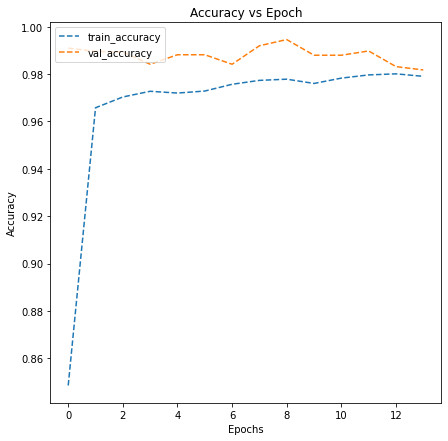

In [ ]:
# plotting the accuracies
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")
plot_accuracy(history)

**Observation**. 
* Model training and testing on **Gaussian Blur** images has lower testing accuracy then training on data augmentation method, but higher than HSV.  
* The test accuracy is 97.54% with the best model having validation accuracy of 98.98% and having training accuracy of 97.97%. 
* The plot shows that validation accuracy is slightly higher than training accuracy.

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1300
           1       1.00      0.96      0.97      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



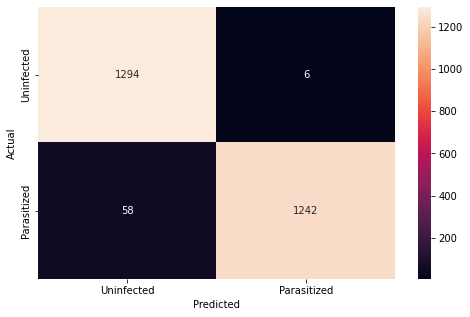

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
#Plotting confusion matrix
test_pred = model8.predict(gauss_test)
test_pred = np.argmax(test_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

#Printing the classification report

print(classification_report(y_true, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observation**. 
From confusion matrix, model can reduce the FP error, but does not seem to reduce FN error, which is more importance error we would like to reduce.

**Checking pretained model like VGG16 and check how it performs on our data, will the model accuracy increase?**

## **Pre-trained model (VGG16)**  
VGG16 is a convolutional neural network model proposed by K.Simonyan and A. Zisserman that has been tarined on a huge dataset and contain weight and bias. Learned features are often transferable to different data.

In [ ]:
# Clearing backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model9 = Model(vgg.input, pred) # Initializing the model

**Compiling the model**

In [ ]:
adam = optimizers.Adam(learning_rate = 0.001)
model9.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

**Callbacks**

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights= True),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

**Fitting and train the model**

In [ ]:
# Fitting the model and running the model for 20 epochs
history = model9.fit(train_images, train_labels,
            epochs = 20,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1)

Epoch 1/20
624/624 [==============================] - 11s 15ms/step - loss: 0.2411 - accuracy: 0.9049 - val_loss: 0.2796 - val_accuracy: 0.8834
Epoch 2/20
624/624 [==============================] - 9s 15ms/step - loss: 0.1726 - accuracy: 0.9323 - val_loss: 0.1577 - val_accuracy: 0.9417
Epoch 3/20
624/624 [==============================] - 9s 14ms/step - loss: 0.1534 - accuracy: 0.9415 - val_loss: 0.2426 - val_accuracy: 0.9153
Epoch 4/20
624/624 [==============================] - 9s 15ms/step - loss: 0.1485 - accuracy: 0.9434 - val_loss: 0.1429 - val_accuracy: 0.9449
Epoch 5/20
624/624 [==============================] - 9s 14ms/step - loss: 0.1380 - accuracy: 0.9486 - val_loss: 0.1441 - val_accuracy: 0.9461
Epoch 6/20
624/624 [==============================] - 9s 14ms/step - loss: 0.1365 - accuracy: 0.9478 - val_loss: 0.1686 - val_accuracy: 0.9387
Epoch 7/20
624/624 [==============================] - 9s 15ms/step - loss: 0.1304 - accuracy: 0.9496 - val_loss: 0.1021 - val_accuracy: 0.958

**Plot the train and validation accuracy**

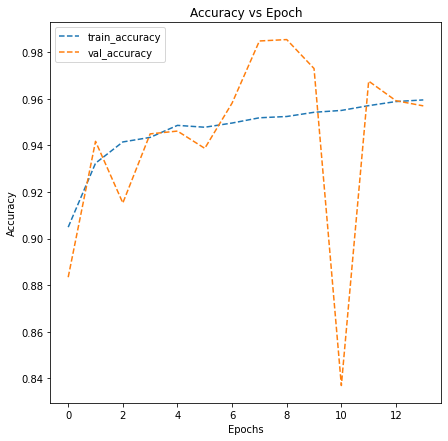

In [ ]:
# plotting the accuracies
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")
    
plot_accuracy(history)

**Observation**. 
* The best for model9 is the epoch with the lowest validation loss of 0.0327 with the validation accuracy of 99.02%, and the training accuracy of 95.53%.  
* The validation curve is fluctuated a lot more than the training curve.

**Evaluating the model**

In [ ]:
# Evaluating the model on test data
accuracy = model9.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 12ms/step - loss: 0.1198 - accuracy: 0.9558

 Test_Accuracy:- 0.9557692408561707


**Plotting the classification report and confusion matrix**

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1300
           1       0.97      0.94      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



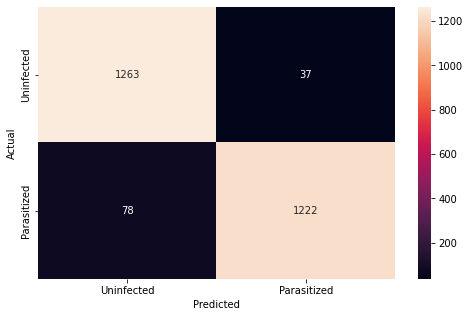

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
#Plotting confusion matrix
test_pred = model9.predict(test_images)
test_pred = np.argmax(test_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

#Printing the classification report

print(classification_report(y_true, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observation**. 
* The accuracy of model9 on testing set is 95.58%, which is lower than our best model.  
* From the confusion matrix, there are higher error in both FN and FP. So this model would not be selected for further analysis.

## **Model10**   
Trying different pretrained model for transfer learning.

In [ ]:
# Clearing backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras import Model

**Trying ResNet50 pre-trained model**

In [ ]:
#ResNet50
resnet_model = ResNet50(include_top=False, weights='imagenet', input_shape=(64,64,3))
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
transfer_layer = resnet_model.get_layer('conv5_block3_out')

resnet_model.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model10 = Model(resnet_model.input, pred) # Initializing the model

In [ ]:
adam = optimizers.Adam(learning_rate = 0.001)
model10.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights= True),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Fitting the model and running the model for 10 epochs
history = model10.fit(train_images, train_labels,
            epochs = 20,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1)

Epoch 1/20
624/624 [==============================] - 23s 29ms/step - loss: 0.6505 - accuracy: 0.6379 - val_loss: 1.0498 - val_accuracy: 0.1092
Epoch 2/20
624/624 [==============================] - 16s 26ms/step - loss: 0.5983 - accuracy: 0.6922 - val_loss: 0.7563 - val_accuracy: 0.5419
Epoch 3/20
624/624 [==============================] - 15s 25ms/step - loss: 0.5758 - accuracy: 0.7107 - val_loss: 0.8346 - val_accuracy: 0.4972
Epoch 4/20
624/624 [==============================] - 16s 26ms/step - loss: 0.5531 - accuracy: 0.7261 - val_loss: 0.4319 - val_accuracy: 0.7682
Epoch 5/20
624/624 [==============================] - 17s 27ms/step - loss: 0.5573 - accuracy: 0.7241 - val_loss: 0.3194 - val_accuracy: 0.9071
Epoch 6/20
624/624 [==============================] - 17s 27ms/step - loss: 0.5536 - accuracy: 0.7324 - val_loss: 0.2260 - val_accuracy: 0.9285
Epoch 7/20
624/624 [==============================] - 16s 26ms/step - loss: 0.5486 - accuracy: 0.7348 - val_loss: 0.6203 - val_accuracy:

In [ ]:
# Evaluating the model on test data
accuracy = model10.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 2s 20ms/step - loss: 0.7064 - accuracy: 0.6185

 Test_Accuracy:- 0.618461549282074


**Observation** 
* The lowest validation loss is 0.2260 with validation accuracy of 92.85% and training accuracy of 73.24. This shows that validation accuracy is significantly higher than training accuracy. Because this model might train better on the validation set.  
* The model did not do well on the testing set, which provide the lowest test accuracy of about 62%. 

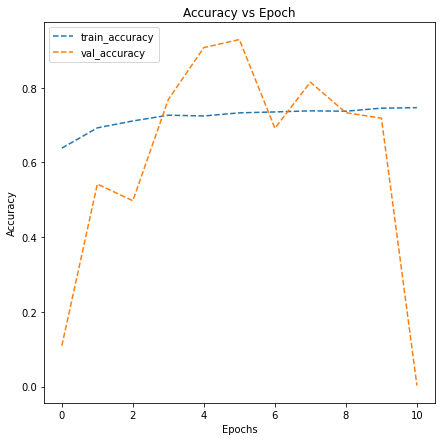

In [ ]:
# plotting the accuracies
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")
plot_accuracy(history)

              precision    recall  f1-score   support

           0       0.58      0.91      0.70      1300
           1       0.78      0.33      0.46      1300

    accuracy                           0.62      2600
   macro avg       0.68      0.62      0.58      2600
weighted avg       0.68      0.62      0.58      2600



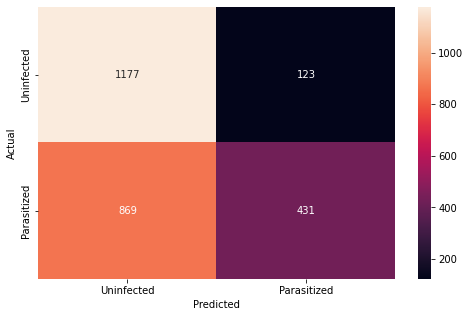

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
#Plotting confusion matrix
test_pred = model10.predict(test_images)
test_pred = np.argmax(test_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

#Printing the classification report

print(classification_report(y_true, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observation**. 
* From the confusion matrix, this model perform very bad to detect the parasitized images showing a very high FN error and low %recall.

**Next, I will summarize the best model**

# **Observation and Conclusions drawn from the final model (Best model):**  
* The **Model5** abd **model6** provide the best model accuracy on testing set of 98.38% and 98.58%, respectively. Batch Normalization and Leaky ReLu activation function are added in model5 and training the model on original image. **Model6** showing higher accuracy and it is training on the images from data augmentation technique. Both model have the same similar % recall, precision and F1-score. **model5** would do better due to less image are detect as uninfected even though it should be detected as parasitized. However, **model6**, if we consider % recall, we can see that it shows the equal % compared to **model5** and **model6** also show the best % precision leading to the best % F1-score. Therefore, **model6** is the best for this study and should be used in malaria detection when both error FN and FP are considered.

## **Improvement that can be done**  
* For VGG-16 and ResNet-50, we can use more trainable layers (not just the last layer) added in feature map and we can try different classification model to see if the model performance can be improved.
* We can use another pre-trained model such as AlexNet, LeNet, GoogLeNet, Xception, and DenseNet-121 and compared the performance of the model from different prestrained models.  
* Using Data Augmentation on HSV and Gaussian Blur images before training with neural networks.
* For the best model like model6 that are train on Data Augmentation images can also be improved by playing with more transform parameters using ImageDataGenerator. 
* Other modifications such as more bath normalization layers between each convolutional layer, different number of neurons in each layer, and less or more dropout layers can also be changed to improve model performance.

# **Insights**

## **Refined insights:**  
**What are the most meaningful insights from the data relevant to the problems?.**   
The most meaningful insights of data are;  
1. The number of parasitized and uninfected images in training, validation and testing set should randomly be split and model might train better in one set than another, which affect the detection accuracy.   
2. The number of parasitized that was accurately predicted need to be high. And we expect less false negative error as it will affect the most to people who actually are infected but model predict them as uninfected.
3. The training data that accurately labels are very important for model to learn to accurately predict parasitized and uninfected red blood cell images on the new data.  
4. Data with false positive is not a serious problem, but some patient who are not infected but detected as infected might alergic to the treatment.

## **Comparison of various techniques and their relative performance:**    
**How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?**    
* Different techniques provide different accuracy on the training, testing and validation set. They also shows different in % recall, precision and F1-score.
* **Model1** only use dense layers and did only 93% accuracy on testing set.  
* **Model2** adds the convolutional layers and shows higher accuracy that **model1**  
* **Model6** that trained on data augmentation did the best because of it shows the highest accuracy and also the less complex than other models.
* Using the same number of neurons in each Conv2D layer in **model3** did not improve the accuracy.
* Adding more layers in **model4** did not improve the accuracy compared to based model; therefore adding more layers did not mean the performance will be increased.  
* Adding batch normalization and change activation from ReLu to Leaky ReLu in **model5** can improve model performance from **model2**.
* **Model5** and **model6** has similar results.
* **Model7** and **model8** that trained on HSV and Gaussian blur image also did not show the improvement of model accuracy.
* **Model9** and **model10** with the transfer learning from pre-trained VGG-16 and ResNet-50, did not perform better than several model.



## **Proposal for the final solution design:**    
**What model do you propose to be adopted? Why is this the best solution to adopt??**  


I would proposed **model5**, and **model6** to be adopted because they have high % recall and lower false negative error. They also have high accuracy on training, validation and testing set. We could improve or using these models in transfer learning of further analysis or further studying other problems. If I would to decide on only 1 model, the **model6** would be selected. 